In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import log_loss


%matplotlib inline

In [87]:
df = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')
#df_test['Loan Status'] = 0

- cross validation 
- plots 


In [88]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

<AxesSubplot:>

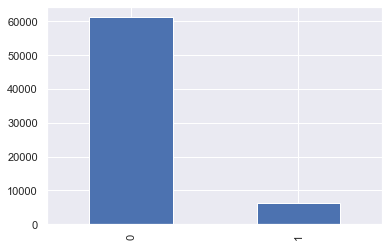

In [90]:
df['Loan Status'].value_counts().plot.bar()

In [91]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Batch Enrolled       67463 non-null  object
 1   Grade                67463 non-null  object
 2   Sub Grade            67463 non-null  object
 3   Employment Duration  67463 non-null  object
 4   Verification Status  67463 non-null  object
 5   Payment Plan         67463 non-null  object
 6   Loan Title           67463 non-null  object
 7   Initial List Status  67463 non-null  object
 8   Application Type     67463 non-null  object
dtypes: object(9)
memory usage: 4.6+ MB


In [92]:
print("people who didnt return: ",df['Loan Status'].value_counts()[0]/df.shape[0] * 100)
print("people returned the loan: ",df['Loan Status'].value_counts()[1]/df.shape[0] * 100)



people who didnt return:  90.74900315728621
people returned the loan:  9.250996842713784


In [93]:
#df.groupby(['Grade'])['Loan Status'].mean()
#df['Grade'].value_counts()

In [94]:
#for the ones that paid
#print(df.groupby(['Grade'])['Loan Status'].mean())
#print(df.groupby(['Grade'])['Loan Status'].sum()/df.groupby(['Grade'])['Loan Status'].count())

### grades dont neccisarily need to have the same initial of grade as the sub grade
- banks label clients accounts based on the clients past history to detect whether the client will pay or not

In [95]:
#first five sub grades in the grad class
df[df['Grade'] == 'A']['Sub Grade'].value_counts().head()

C1    903
B4    765
B2    715
B3    676
A5    650
Name: Sub Grade, dtype: int64

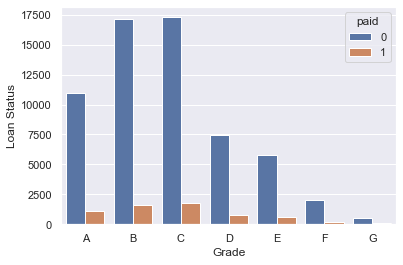

In [96]:
#print("accounts delequents categories: ",df['Accounts Delinquent'].value_counts())
#print("application types: ",df['Application Type'].value_counts())
df_paid_grade = df[df['Loan Status'] == 1].groupby(['Grade']).agg({'Loan Status': 'count'})
df_didntpay_grade = df[df['Loan Status'] == 0].groupby(['Grade']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
plt.show()

# Exporatory analysis
### Balancing the dataset
#### The plots are misleading because of the class imbalance

In [97]:
df_balanced = df[df['Loan Status'] == 0].sample(df[df['Loan Status'] == 1].shape[0])
df_balanced = pd.concat([df_balanced, df[df['Loan Status'] == 1]])
df_balanced.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
7835,37713143,5753,12001,12101.729360,59,BAT5924421,10.181683,B,C3,MORTGAGE,...,6.055807,15.363836,0,INDIVIDUAL,65,0,21,7397,13438,0
3143,52208606,15320,10830,11532.056760,59,BAT1930365,10.453053,E,D1,MORTGAGE,...,2.390517,1.321970,0,INDIVIDUAL,38,0,24,143206,38767,0
13714,6457605,17488,10142,9383.781291,59,BAT3193689,15.801723,B,C5,RENT,...,3.814145,1.344918,0,INDIVIDUAL,61,0,29,149338,27903,0
28514,4845157,10151,7420,20277.558510,58,BAT4351734,11.647633,E,D1,RENT,...,6.377073,0.944858,0,INDIVIDUAL,72,0,55,163727,32398,0
26065,65943593,19044,31969,12250.400710,59,BAT2522922,15.451324,A,F1,MORTGAGE,...,2.201968,1.350373,0,INDIVIDUAL,158,0,435,51457,21673,0


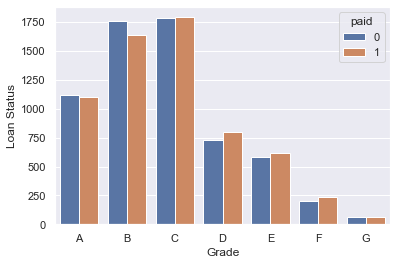

In [98]:
#print("accounts delequents categories: ",df['Accounts Delinquent'].value_counts())
#print("application types: ",df['Application Type'].value_counts())
df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Grade']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Grade']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
plt.show()

<AxesSubplot:>

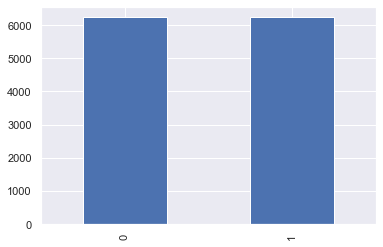

In [99]:
df_balanced['Loan Status'].value_counts().plot.bar()

In [100]:
#grade ,sub grade
#Employment Duration
#verification status
#Initial Status

### based on value_counts and bar plots
- batch enrolled class has a variety of categories more searching needed to know what it actually is 
- Accounts Delinquent contains only one class so its useless
- payment plan seems useless
- grade class seems usable
- sub grades also seem usable
- Employment Duration is usable
- verification status is usable
- loan title has different categories but some do not seem sufficient
- Initial List Status is usable
- app type type is imbalanced so it will need some looking up

<AxesSubplot:>

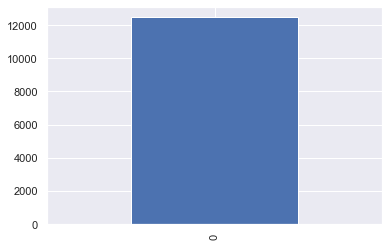

In [101]:
df_balanced['Accounts Delinquent'].value_counts().plot.bar()


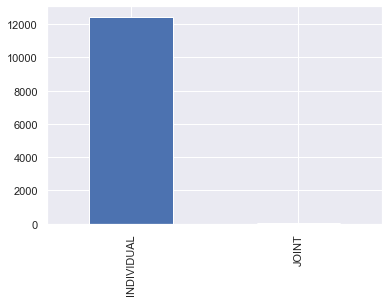

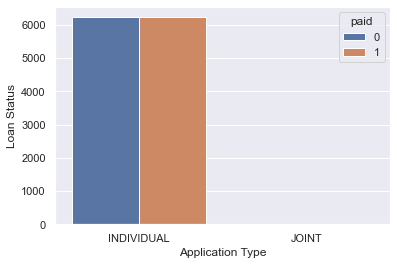

In [102]:
df_balanced['Application Type'].value_counts().plot.bar(),
#df_balanced['Application Type'].value_counts().plot.bar()

#print("accounts delequents categories: ",df['Accounts Delinquent'].value_counts())
#print("application types: ",df['Application Type'].value_counts())
df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Application Type']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Application Type']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
plt.show()

In [103]:
#df_balanced['Sub Grade'].value_counts()

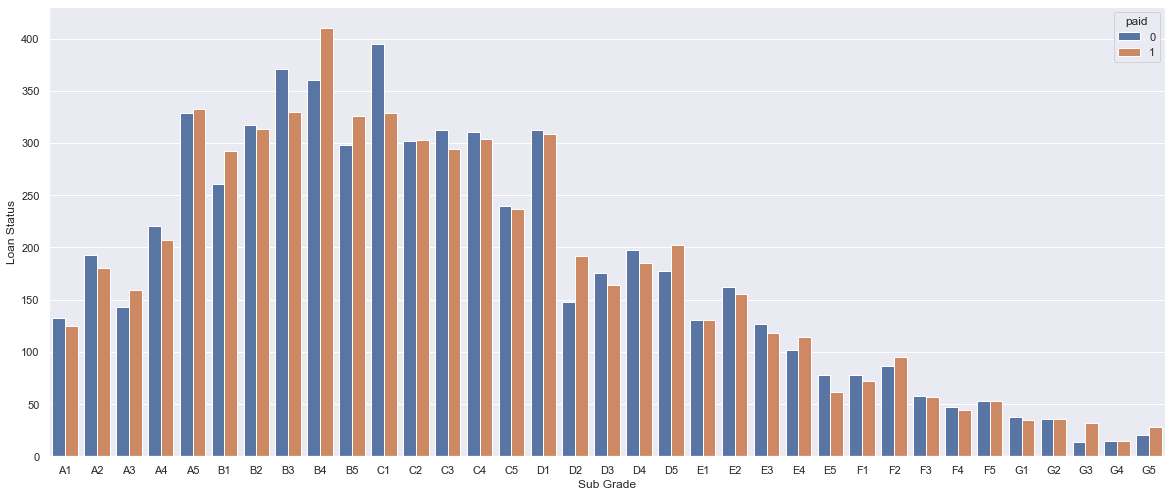

In [105]:
df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Sub Grade']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Sub Grade']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')


plt.show()

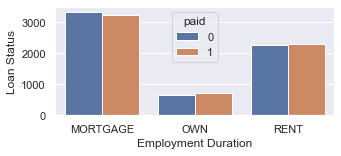

In [107]:

#verification status
#Initial Status

df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Employment Duration']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Employment Duration']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
sns.set(rc={'figure.figsize':(5,2)})

plt.show()

In [21]:
df_balanced['Verification Status'].value_counts()

Source Verified    6132
Verified           3315
Not Verified       3035
Name: Verification Status, dtype: int64

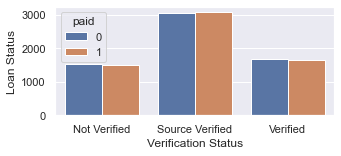

In [22]:
#Employment Duration
#verification status
#Initial Status

df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Verification Status']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Verification Status']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
sns.set(rc={'figure.figsize':(5,2)})

plt.show()

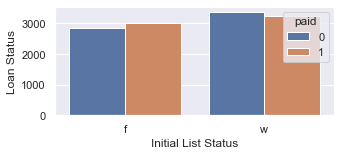

In [23]:
df_paid_grade = df_balanced[df_balanced['Loan Status'] == 1].groupby(['Initial List Status']).agg({'Loan Status': 'count'})
df_didntpay_grade = df_balanced[df_balanced['Loan Status'] == 0].groupby(['Initial List Status']).agg({'Loan Status': 'count'})
#['Loan Status'].count()#.value_counts()
plt.figure();

#df_paid_grade.plot.bar(label = 'didnt return')
#df_didntpay_grade.plot.bar(label = 'returned')
#plt.legend()
df_paid_grade['paid'] = 1
df_didntpay_grade['paid'] = 0
res=pd.concat([df_paid_grade,df_didntpay_grade])
sns.barplot(x = res.index,y='Loan Status',data=res,hue='paid')
sns.set(rc={'figure.figsize':(5,2)})

plt.show()

In [24]:
#df.shape

In [25]:
df_balanced.corr()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,-0.014801,-0.013474,0.010508,-0.002349,0.010025,-0.013232,-0.013279,0.005772,-0.002545,...,0.007119,-0.009450,0.005798,0.001562,-0.009104,NaN,-0.007213,0.004483,-0.010279,-0.003684
Loan Amount,-0.014801,1.000000,0.002055,-0.005696,0.000875,-0.012707,0.019419,0.002818,0.001582,0.010441,...,-0.006160,0.000680,-0.017303,0.009238,-0.015732,NaN,0.003219,0.005646,0.001906,-0.018140
Funded Amount,-0.013474,0.002055,1.000000,0.011483,-0.002044,0.000873,-0.007237,0.003179,0.026908,0.005014,...,-0.014930,0.022697,-0.001512,-0.005061,-0.016915,NaN,-0.010624,0.001161,0.002641,0.015237
Funded Amount Investor,0.010508,-0.005696,0.011483,1.000000,-0.000780,0.001248,-0.004167,-0.013840,0.003775,-0.002169,...,-0.014929,0.001416,0.001925,0.018928,0.007363,NaN,0.002080,-0.014358,-0.000179,0.002518
Term,-0.002349,0.000875,-0.002044,-0.000780,1.000000,-0.018607,-0.026678,-0.001712,-0.018264,-0.024510,...,-0.005207,0.002517,-0.028734,0.001916,0.004545,NaN,-0.005062,0.012568,-0.010133,0.000276
Interest Rate,0.010025,-0.012707,0.000873,0.001248,-0.018607,1.000000,0.002093,-0.002696,0.013378,0.008036,...,0.009846,0.017695,0.019159,-0.006915,-0.018667,NaN,-0.007757,-0.017300,0.030933,0.005698
Home Ownership,-0.013232,0.019419,-0.007237,-0.004167,-0.026678,0.002093,1.000000,0.037052,-0.007880,-0.006467,...,-0.003614,-0.003653,-0.011716,0.003216,-0.003581,NaN,0.016884,0.005323,0.017954,0.004542
Debit to Income,-0.013279,0.002818,0.003179,-0.013840,-0.001712,-0.002696,0.037052,1.000000,0.002093,0.000427,...,-0.007947,-0.010274,-0.011528,-0.008868,0.014561,NaN,0.007336,0.000334,-0.008191,-0.011470
Delinquency - two years,0.005772,0.001582,0.026908,0.003775,-0.018264,0.013378,-0.007880,0.002093,1.000000,0.019532,...,0.013059,0.015109,-0.003138,0.008305,0.003471,NaN,0.008868,-0.007522,0.015682,0.015528
Inquires - six months,-0.002545,0.010441,0.005014,-0.002169,-0.024510,0.008036,-0.006467,0.000427,0.019532,1.000000,...,0.003036,0.015999,0.028980,0.009937,-0.003875,NaN,0.001920,0.003434,-0.000975,-0.006996


### DataPrep
- onehot encoding 
- single column encoding

In [26]:
#onehot encoding
#grade ,sub grade
#Employment Duration
#verification status
#Initial Status
def prep(df):
    #df = pd.concat([df, pd.get_dummies(df['Batch Enrolled'])], axis=1)
    #df = df.drop('Batch Enrolled' ,axis = 1)

    #a,b,c,d
    df = pd.concat([df, pd.get_dummies(df['Grade'])], axis=1)
    df = df.drop('Grade', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Sub Grade'])], axis=1)
    df = df.drop('Sub Grade', axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Employment Duration'])], axis=1)
    df = df.drop('Employment Duration', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Verification Status'])], axis=1)
    df = df.drop('Verification Status', axis = 1)



    #df = pd.concat([df, pd.get_dummies(df['Payment Plan'])], axis=1)
    #df = df.drop('Payment Plan', axis = 1)

    #df = pd.concat([df, pd.get_dummies(df['Loan Title'])], axis=1)
    #df = df.drop('Loan Title', axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Initial List Status'])], axis=1)
    df = df.drop('Initial List Status', axis = 1)

    #df = pd.concat([df, pd.get_dummies(df['Application Type'])], axis=1)
    #df = df.drop('Application Type', axis = 1)
    return df

# Balanced dataset using downsampling

In [27]:
df_balanced = prep(df_balanced.copy())
df_balanced.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Home Ownership,Payment Plan,Loan Title,...,G4,G5,MORTGAGE,OWN,RENT,Not Verified,Source Verified,Verified,f,w
67390,41538248,18318,19544,10013.401110,59,BAT1586599,9.912584,129381.71990,n,Debt consolidation,...,0,0,1,0,0,0,0,1,1,0
45782,54734317,24414,10005,9594.494888,58,BAT1586599,9.967193,16494.13715,n,Credit card refinancing,...,0,0,0,0,1,1,0,0,1,0
29329,36213592,23939,22737,9927.101323,59,BAT3873588,20.170655,74361.12806,n,Debt consolidation,...,0,0,1,0,0,0,0,1,0,1
12161,61183267,19554,10216,7299.518226,58,BAT2558388,7.372061,64380.14707,n,Credit card refinancing,...,0,0,0,0,1,1,0,0,0,1
23506,3811731,14545,22984,12344.398250,59,BAT3461431,11.554304,67974.13716,n,Credit card refinancing,...,0,0,0,0,1,0,1,0,0,1


In [28]:
df_quan = df_balanced.drop(df_balanced.select_dtypes('object').columns, axis=1)
#df_quan_test = df_test.drop(df_test.select_dtypes('object').columns, axis=1)

df_quan = df_quan.sample(frac = 1)

In [29]:
from sklearn.preprocessing import StandardScaler

df_quan.iloc[:,:25] = StandardScaler().fit_transform(df_quan.iloc[:,:25])



In [30]:
from sklearn.model_selection import train_test_split

#X_quan = df_quan.iloc[:,0:25]
#quan not used anymore
X_quan = df_quan.loc[:, df_quan.columns != 'Loan Status']
Y_quan = df_quan['Loan Status']

#X_quan.drop('ID',axis = 1,inplace = True)
X_train, X_test, y_train, y_test = train_test_split(
    X_quan, Y_quan, test_size=0.33, random_state=42)

#X_quan_test = df_quan_test.iloc[:,0:25]
#Y_quan_test = df_quan_test['Loan Status']

### KNN

In [31]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
#accuracy 
Y_quan_predict = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, Y_quan_predict)

Accuracy: 0.5089805825242718


16.959407048032375

In [33]:
from sklearn.model_selection import cross_val_score


#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_quan, Y_quan, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.49319456 0.47798239 0.50560897 0.50480769 0.49519231 0.51282051
 0.50240385 0.50400641 0.50320513 0.49278846]
cv_scores mean:0.49920102748865763


In [34]:
cv_means = np.array([])
cv_index = np.array([])
for i in range(20):
    # Create KNN classifier
    if(i % 2 != 0):
        knn_cv = KNeighborsClassifier(n_neighbors=i)
        #train model with cv of 5 
        cv_scores = cross_val_score(knn_cv, X_quan, Y_quan, cv=10)
        #print each cv score (accuracy) and average them
        #print(cv_scores)
        cv_means = np.append(cv_means,np.mean(cv_scores))
        cv_index = np.append(cv_index,i)
        print('cv_scores mean:{}'.format(np.mean(cv_scores)))


cv_scores mean:0.49663833631007376
cv_scores mean:0.49727673164172365
cv_scores mean:0.49920102748865763
cv_scores mean:0.5025670536429143
cv_scores mean:0.5032858979491285
cv_scores mean:0.5040073725647185
cv_scores mean:0.5004826296934983
cv_scores mean:0.501443911539488
cv_scores mean:0.496077952105274
cv_scores mean:0.49463558025907906


([<matplotlib.axis.XTick at 0x22ec7d3d188>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

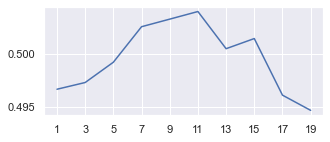

In [35]:
#means_series = pd.Series(cv_means) 
#means_df = pd.DataFrame(index=list(range(0,len(means_series)+1)))
#means_df["scores"] = means_series
#means_df.plot()
#means_df
plt.plot(cv_index,cv_means)
plt.xticks(cv_index)

### SVM

In [36]:
from sklearn import svm
clf = svm.SVC(gamma = 'auto')
clf.fit(X_train.iloc[0:1000], y_train.iloc[0:1000])

SVC(gamma='auto')

In [37]:
Y_quan_predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, Y_quan_predict)

Accuracy: 0.5109223300970874


16.89236164681234

In [38]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C':[0.0001] ,
              'gamma': [ 0.01],
              'kernel': ['rbf']}
 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.503 total time=   4.3s
[CV 2/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.502 total time=   5.2s
[CV 3/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.502 total time=   4.4s
[CV 4/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.502 total time=   4.7s
[CV 5/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.502 total time=   5.5s
{'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.0001, gamma=0.01)


In [39]:

grid_predictions = grid.predict(X_test)

# print classification report
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions ))

Accuracy: 0.49514563106796117


### naive bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_quan_predict = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, Y_quan_predict)

Accuracy: 0.49441747572815536


17.4623482831696

### logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
Y_quan_predict = clf.predict(X_test)
#gnb.fit(X_quan_train, Y_quan_train)

print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, Y_quan_predict)


Accuracy: 0.4929611650485437


17.512702007744195

### MLP  sklearn

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1,hidden_layer_sizes = (512,32),activation = "relu",solver = "sgd" ,max_iter=300).fit(X_train, y_train)
Y_quan_predict = clf.predict(X_test)



#clf.predict(X_test[:5, :])
#clf.score(X_test, y_test)


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [43]:
#log_loss(y_test,model/''.predict(X_test).reshape(y_test.shape,))
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, Y_quan_predict)

Accuracy: 0.49101941747572814


17.57976545812953

### keras tensorflow

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

C:\Users\ahmed\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ahmed\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ahmed\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ahmed\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [45]:
#tf.convert_to_tensor(X_train.values)
#normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(numeric_features)
#np.array(y_train)

In [46]:
from tensorflow.keras import callbacks

# YOUR CODE HERE: define an early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [47]:
# Create the model
model = Sequential()
model.add(Dense(100, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

# Configure the model and start training
#optimzer sgd, adam
#binary cross enropy is logloss
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2,
    callbacks=[early_stopping])

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 6689 samples, validate on 1673 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
6689/6689 [==============================] - 0s 23us/sample - loss: 1.8294 - acc: 0.5016 - val_loss: 1.1418 - val_acc: 0.5081
Epoch 2/50
6689/6689 [==============================] - 0s 7us/sample - loss: 0.9505 - acc: 0.5108 - val_loss: 0.8891 - val_acc: 0.5009
Epoch 3/50
6689/6689 [==============================] - 0s 6us/sample - loss: 0.8063 - acc: 0.5098 - val_loss: 0.8060 - val_acc: 0.5140
Epoch 4/50
6689/6689 [==============================] - 0s 6us/sample - loss: 0.7564 - acc: 0.5228 - val_loss: 0.7999 - val_acc: 0.5140
Epoch 5/50
6689/6689 [==============================] - 0s 6us/sample - loss: 0.7409 - acc: 0.5286 - val_loss: 0.8027 - val_acc: 0.5123
Epoch 6/50
6689/6689 [==============================] - 0s 

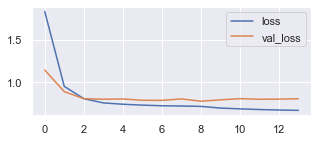

In [48]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
#history.history

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test).astype(int)))
log_loss(y_test,model.predict(X_test).astype(int))


Accuracy: 0.5050970873786408


17.093341618450285

# Smote

In [50]:
df_smote = prep(df.copy())
df_smote = df_smote.drop(df_smote.select_dtypes('object').columns, axis=1)


In [51]:
X_smote = df_smote.loc[:, df_quan.columns != 'Loan Status']
Y_smote = df_smote['Loan Status']

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, Y_smote = smote.fit_resample(X_smote, Y_smote)

#print('Original dataset shape', Counter(y))
#print('Resample dataset shape', Counter(y_ros))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_quan, Y_quan, test_size=0.33, random_state=42)

### KNN

In [54]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
#accuracy 
y_quan_predict = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))


Accuracy: 0.4963592233009709


In [56]:
cv_means = np.array([])
cv_index = np.array([])
for i in range(20):
    # Create KNN classifier
    if(i % 2 != 0):
        knn_cv = KNeighborsClassifier(n_neighbors=i)
        #train model with cv of 5 
        cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=10)
        #print each cv score (accuracy) and average them
        #print(cv_scores)
        cv_means = np.append(cv_means,np.mean(cv_scores))
        cv_index = np.append(cv_index,i)
        print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores mean:0.49760794132610775
cv_scores mean:0.48935621066351115
cv_scores mean:0.49748846701308497
cv_scores mean:0.49952467516134746
cv_scores mean:0.49402285446428057
cv_scores mean:0.49366328823035105
cv_scores mean:0.4919906478480332
cv_scores mean:0.48780676030251585
cv_scores mean:0.4910351391675671
cv_scores mean:0.49713490307717817


([<matplotlib.axis.XTick at 0x22ec548d988>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

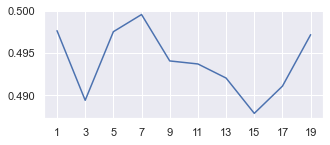

In [57]:
plt.plot(cv_index,cv_means)
plt.xticks(cv_index)

### SVM

In [58]:
from sklearn import svm
clf = svm.SVC(gamma = 'auto')
clf.fit(X_train.iloc[0:1000], y_train.iloc[0:1000])

SVC(gamma='auto')

In [59]:
Y_quan_predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))
log_loss(y_test, y_quan_predict)

Accuracy: 0.4963592233009709


17.395334128353998

### naive bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_quan_predict = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, y_quan_predict)

Accuracy: 0.49441747572815536


17.395334128353998

### logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
Y_quan_predict = clf.predict(X_test)
#gnb.fit(X_quan_train, Y_quan_train)

print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, y_quan_predict)

Accuracy: 0.4929611650485437


17.395334128353998

### keras tensorflow

In [62]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [63]:
# Create the model
model = Sequential()
model.add(Dense(100, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

# Configure the model and start training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2,
    callbacks=[early_stopping])

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Train on 6689 samples, validate on 1673 samples
Epoch 1/50
6689/6689 [==============================] - 0s 23us/sample - loss: 1.8102 - acc: 0.5129 - val_loss: 1.2748 - val_acc: 0.4991
Epoch 2/50
6689/6689 [==============================] - 0s 6us/sample - loss: 1.0734 - acc: 0.5200 - val_loss: 0.9923 - val_acc: 0.4889
Epoch 3/50
6689/6689 [==============================] - 0s 6us/sample - loss: 0.8841 - acc: 0.5159 - val_loss: 0.9126 - val_acc: 0.4812
Epoch 4/50
6689/6689 [==============================] - 0s 7us/sample - loss: 0.8074 - acc: 0.5174 - val_loss: 0.8463 - val_acc: 0.4848
Epoch 5/50
6689/6689 [==============================] - 0s 6us/sample - loss: 0.7729 - acc: 0.5219 - val_loss: 0.8195 - val_acc: 0.4830
Epoch 6/50
6689/6689 [==============================] - 0s 6us/sample - loss: 0.7470 - acc: 0.5258 - val_loss: 0.8049 - val_acc: 0.4901
Epoch 7/50
6689/6689 [==============================] - 0s 6us/sample - loss: 0.7313 - acc: 0.5337 - val_loss: 0.7879 - val_acc: 0.4746

In [64]:
#print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test).astype(int)))
log_loss(y_test,model.predict(X_test).astype(int))

17.11849198922078

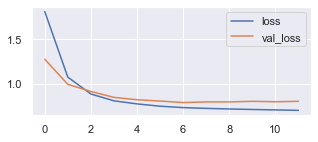

In [65]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

# Original unblanaced Dataset 

In [66]:
df = prep(df.copy())
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Home Ownership,Payment Plan,Loan Title,...,G4,G5,MORTGAGE,OWN,RENT,Not Verified,Source Verified,Verified,f,w
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,176346.62670,n,Debt Consolidation,...,0,0,1,0,0,1,0,0,0,1
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,39833.92100,n,Debt consolidation,...,0,0,0,0,1,0,1,0,1,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,91506.69105,n,Debt Consolidation,...,0,0,1,0,0,0,1,0,0,1
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,108286.57590,n,Debt consolidation,...,0,0,1,0,0,0,1,0,0,1
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,44234.82545,n,Credit card refinancing,...,0,0,1,0,0,0,1,0,0,1


In [67]:
df_quan = df.drop(df.select_dtypes('object').columns, axis=1)
#df_quan_test = df_test.drop(df_test.select_dtypes('object').columns, axis=1)

#df_balanced.info()

In [68]:
from sklearn.model_selection import train_test_split

#X_quan = df_quan.iloc[:,0:25]
#quan not used anymore
X_quan = df_quan.loc[:, df_quan.columns != 'Loan Status']
Y_quan = df_quan['Loan Status']


X_train, X_test, y_train, y_test = train_test_split(
    X_quan, Y_quan, test_size=0.5, random_state=42)

#X_quan_test = df_quan_test.iloc[:,0:25]
#Y_quan_test = df_quan_test['Loan Status']

In [69]:
#y_test.value_counts()

### KNN

In [70]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
#accuracy 
y_quan_predict = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))


Accuracy: 0.8891853432942014


In [72]:
cv_means = np.array([])
cv_index = np.array([])
for i in range(20):
    # Create KNN classifier
    if(i % 2 != 0):
        knn_cv = KNeighborsClassifier(n_neighbors=i)
        #train model with cv of 5 
        cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=10)
        #print each cv score (accuracy) and average them
        #print(cv_scores)
        cv_means = np.append(cv_means,np.mean(cv_scores))
        cv_index = np.append(cv_index,i)
        print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores mean:0.8292075868006524
cv_scores mean:0.8861286259604366
cv_scores mean:0.9015446243056765
cv_scores mean:0.9044202795272124
cv_scores mean:0.9055468291293302
cv_scores mean:0.9058432923257691
cv_scores mean:0.9059025867224484
cv_scores mean:0.9059025867224484
cv_scores mean:0.9059025867224484
cv_scores mean:0.9059025867224484


([<matplotlib.axis.XTick at 0x22e808b6648>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

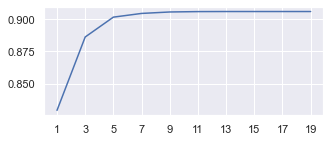

In [73]:
plt.plot(cv_index,cv_means)
plt.xticks(cv_index)

### SVM

In [74]:
from sklearn import svm
clf = svm.SVC(gamma = 'auto')
clf.fit(X_train.iloc[0:1000], y_train.iloc[0:1000])

SVC(gamma='auto')

In [75]:
Y_quan_predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, y_quan_predict)

Accuracy: 0.9090774338906676


3.8274203327362466

In [76]:
# defining parameter range
param_grid = {'C':[0.0001] ,
              'gamma': [ 0.01],
              'kernel': ['rbf']}
 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.906 total time=  19.5s
[CV 2/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.906 total time=  19.5s
[CV 3/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.906 total time=  19.4s
[CV 4/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.906 total time=  19.5s
[CV 5/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.906 total time=  19.4s
{'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.0001, gamma=0.01)


In [77]:

grid_predictions = grid.predict(X_test)

# print classification report
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions ))

Accuracy: 0.9090774338906676


### naive bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_quan_predict = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, y_quan_predict)

Accuracy: 0.9063204079212617


3.8274203327362466

### logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
Y_quan_predict = clf.predict(X_test)
#gnb.fit(X_quan_train, Y_quan_train)

print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
log_loss(y_test, y_quan_predict)

Accuracy: 0.9090774338906676


3.8274203327362466

### keras tensorflow

In [80]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [81]:
# Create the model
model = Sequential()
model.add(Dense(100, input_shape=[X_train.shape[1]], activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Configure the model and start training
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2,
    callbacks=[early_stopping])

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Train on 26984 samples, validate on 6747 samples
Epoch 1/50
26984/26984 [==============================] - 0s 9us/sample - loss: 0.3599 - acc: 0.9051 - val_loss: 0.3092 - val_acc: 0.9090
Epoch 2/50
26984/26984 [==============================] - 0s 6us/sample - loss: 0.3147 - acc: 0.9051 - val_loss: 0.3055 - val_acc: 0.9090
Epoch 3/50
26984/26984 [==============================] - 0s 5us/sample - loss: 0.3137 - acc: 0.9051 - val_loss: 0.3050 - val_acc: 0.9090
Epoch 4/50
26984/26984 [==============================] - 0s 5us/sample - loss: 0.3136 - acc: 0.9051 - val_loss: 0.3050 - val_acc: 0.9090
Epoch 5/50
26984/26984 [==============================] - 0s 5us/sample - loss: 0.3136 - acc: 0.9051 - val_loss: 0.3050 - val_acc: 0.9090
Epoch 6/50
26984/26984 [==============================] - 0s 5us/sample - loss: 0.3136 - acc: 0.9051 - val_loss: 0.3050 - val_acc: 0.9090
Epoch 7/50
33732/33732 [==============================] - 0s 9us/sample - loss: 0.3053 - acc: 0.9091
Test results - Loss: 0

In [82]:
#print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test).astype(int)))
log_loss(y_test,model.predict(X_test).astype(int))

3.140354180101716

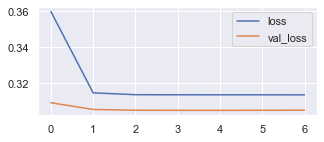

In [83]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [84]:
'''
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in Rest Object Columns.
loan_train['Batch Enrolled']= label_encoder.fit_transform(loan_train['Batch Enrolled'])
 
loan_train['Batch Enrolled'].unique()
'''

"\nfrom sklearn import preprocessing\n \n# label_encoder object knows how to understand word labels.\nlabel_encoder = preprocessing.LabelEncoder()\n \n# Encode labels in Rest Object Columns.\nloan_train['Batch Enrolled']= label_encoder.fit_transform(loan_train['Batch Enrolled'])\n \nloan_train['Batch Enrolled'].unique()\n"

## SMote

In [85]:
# import library
